In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Display EEG and MEG sensors location
1) Plot MEG sensor locations and the region centres given by the
connectivity matrix.  

2) Plot EEG sensor locations on top of a surface representing the skin-air
boundary

In [2]:
from tvb.simulator.lab import *

####Load datatypes

In [3]:
# Get 'default' MEG sensors
sens_meg = sensors.SensorsMEG(load_default=True)

# Get connectivity
white_matter = connectivity.Connectivity(load_default=True)
centres = white_matter.centres

# Get surface - SkinAir
skin = surfaces.SkinAir(load_default=True)
skin.configure()

# Get 'default' EEG sensors
sens_eeg = sensors.SensorsEEG(load_default=True)
sens_eeg.configure()

# Project eeg unit vector locations onto the surface space
sensor_locations_eeg = sens_eeg.sensors_to_surface(skin)

####Plot pretty pictures of what we just did 

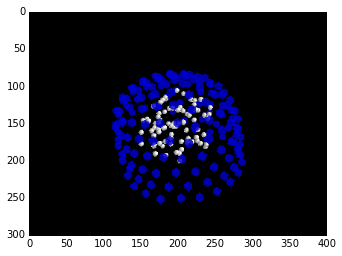

In [5]:
try:
    from tvb.simulator.plot.tools import mlab
    
    fig_meg = mlab.figure(figure='MEG sensors', bgcolor=(0.0, 0.0, 0.0))
    
    region_centres = mlab.points3d(centres[:, 0], 
                                   centres[:, 1], 
                                   centres[:, 2],
                                   color=(0.9, 0.9, 0.9),
                                   scale_factor = 10.)
    
    meg_sensor_loc = mlab.points3d(sens_meg.locations[:, 0],
                                   sens_meg.locations[:, 1], 
                                   sens_meg.locations[:, 2], 
                                   color=(0, 0, 1), 
                                   opacity = 0.6,
                                   scale_factor = 10,
                                   mode='cube')
    
    plot_surface(skin)
    eeg_sensor_loc = mlab.points3d(sensor_locations_eeg[:, 0],
                                   sensor_locations_eeg[:, 1],
                                   sensor_locations_eeg[:, 2],
                                   color=(0, 0, 1),
                                   opacity = 0.7,
                                   scale_factor=5)
    # Plot them
    mlab.show(stop=True)
    # plot a screenshot of the Mayavi Scene
    imshow(mlab.screenshot())
except ImportError:
    LOG.exception("Could not display!")
    pass